In [3]:
#Importation des librairies 
import umap
import umap.plot

import warnings
import seaborn as sns
from sklearn_extra.cluster import KMedoids
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn import decomposition
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# Pour les biplot
from bioinfokit.visuz import cluster
from IPython import display
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import  PowerTransformer
from scipy import stats
from sklearn.preprocessing import  QuantileTransformer

#import matplotlib.pyplot as plt3D
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)
warnings.filterwarnings('ignore')


In [4]:
data_full = pd.read_csv(
    "/Users/anis/test_labnbook/test_3_indicateurs/comparaison/data.csv")
data_full.drop(["Unnamed: 0"], axis=1, inplace=True)
# Supprimer les labdocs ayant un score de contribution nul
data_full.drop(index=data_full[data_full["indice_contrib"]
               == 0].index.values, axis=0, inplace=True)
data_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17705 entries, 0 to 20242
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_labdoc       17705 non-null  int64  
 1   n_users         17705 non-null  int64  
 2   n_mots          17705 non-null  int64  
 3   indice_collab   17705 non-null  float64
 4   indice_contrib  17705 non-null  float64
 5   n_modif         17705 non-null  int64  
 6   duree           17705 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 1.1 MB


In [5]:
data_full.head()

,id_labdoc,n_users,n_mots,indice_collab,indice_contrib,n_modif,duree
0,313544,3,67,0.086970,0.089902,13,1934637.0
1,325259,2,180,0.616471,0.947732,64,215938.0
2,313676,3,110,0.035226,0.036662,66,1818387.0
4,313555,3,152,0.066678,0.069033,9,1933760.0
5,312700,5,38,0.555177,0.555177,18,2278994.0


<AxesSubplot:>

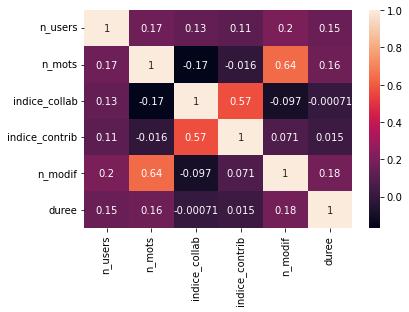

In [6]:
sns.heatmap(data_full.drop(["id_labdoc"],axis=1).corr(),annot=True)

* Forte corrélation entre le nombre de mots et le nombre de modifications. Plus le labdoc est long, plus il y a de modifications.
* Forte corrélation entre l'indice de collaboration et l'indice de contribution

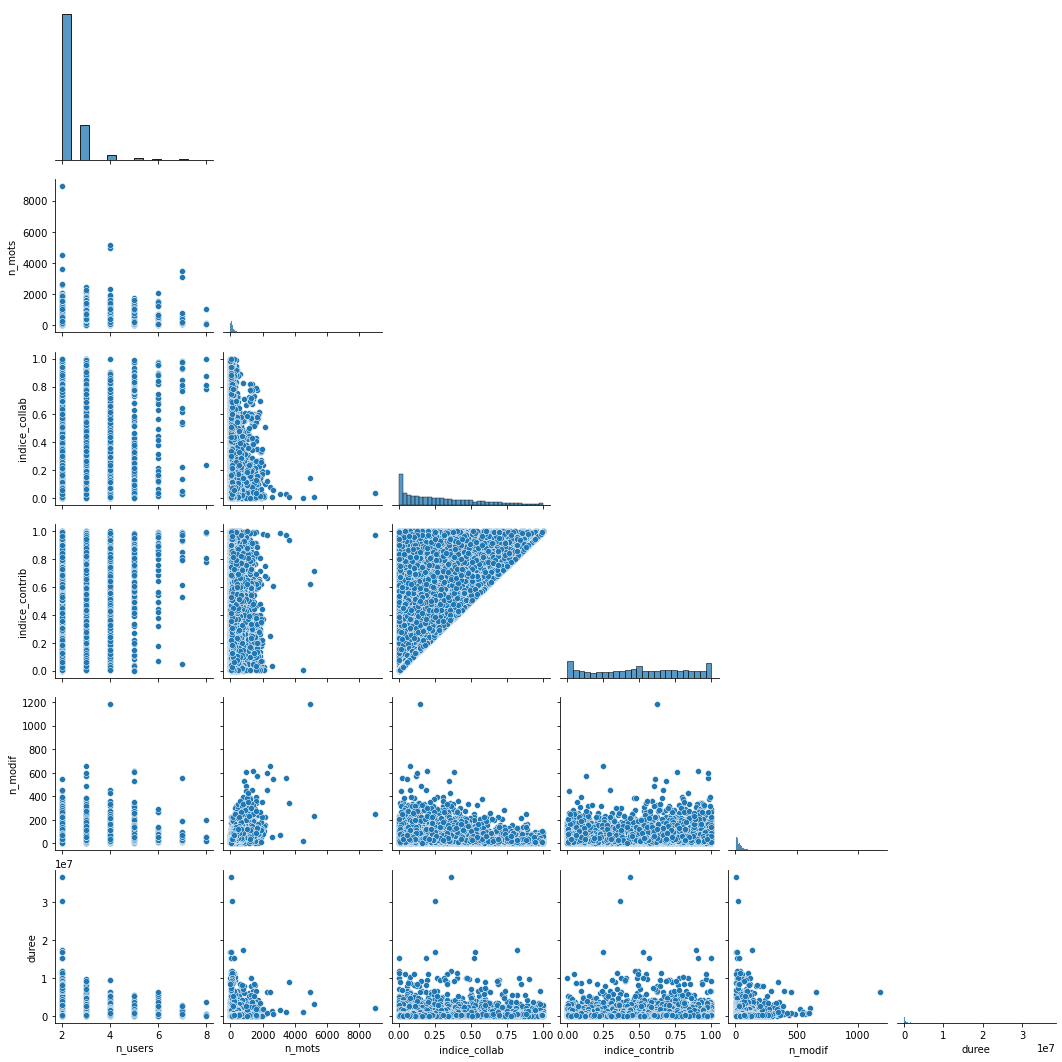

In [7]:
sns.pairplot(data_full.drop(["id_labdoc"],axis=1),corner=True)

In [8]:
data_full.drop(index=data_full[data_full["indice_collab"] < 0].index.values, inplace=True)

# J'enlève la variable n_users
X = data_full.drop([ "n_users"], axis=1)


#X.index = np.array(data['id_labdoc'])
id_labdoc = data_full['id_labdoc']
X.drop(['id_labdoc'], axis=1, inplace=True)

# z_scores = stats.zscore(X)
# abs_z_scores = np.abs(z_scores)
# filtered_entries = (abs_z_scores < 3).all(axis=1)
# X = X[filtered_entries]
# X.info()

X.head()

,n_mots,indice_collab,indice_contrib,n_modif,duree
0,67,0.086970,0.089902,13,1934637.0
1,180,0.616471,0.947732,64,215938.0
2,110,0.035226,0.036662,66,1818387.0
4,152,0.066678,0.069033,9,1933760.0
5,38,0.555177,0.555177,18,2278994.0


In [9]:
X.describe()

,n_mots,indice_collab,indice_contrib,n_modif,duree
count,17704.000000,17704.000000,17704.000000,17704.000000,1.770400e+04
mean,183.935721,0.289052,0.506064,39.377598,2.996748e+05
std,254.366959,0.257064,0.308033,43.180514,8.954365e+05
min,1.000000,0.000000,0.000036,1.000000,0.000000e+00
25%,57.000000,0.068432,0.245748,14.000000,3.092000e+03
50%,111.000000,0.225390,0.500615,27.000000,2.746800e+04
75%,212.000000,0.451134,0.768296,50.000000,2.440733e+05
max,8936.000000,1.000000,1.000000,1183.000000,3.664991e+07


# Préparation des données 
* voir https://developers.google.com/machine-learning/data-prep/transform/normalization
* transformer les distributions puissance avec log 
* normaliser les distributions gausiennes
* quantile pour les distributions atypique https://developers.google.com/machine-learning/data-prep/transform/bucketing

In [10]:
data_tr = pd.DataFrame()

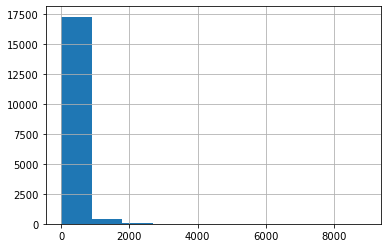

In [11]:
X["n_mots"].hist()
plt.show()

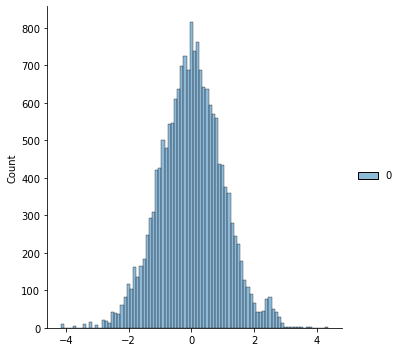

In [12]:
# Transformation log de n_mots
qt = QuantileTransformer(output_distribution='normal')
pt = PowerTransformer()

n_mots_tr = pt.fit_transform(
    np.array(X["n_mots"]).reshape(-1, 1))
#np.log(X["n_mots"])
data_tr["n_mots_tr"] = n_mots_tr.reshape(-1)
sns.displot(n_mots_tr)
plt.show()


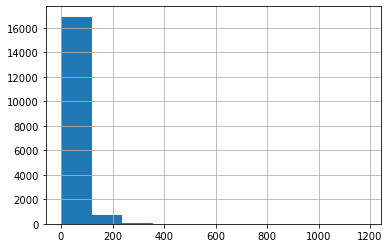

In [13]:
X["n_modif"].hist()
plt.show()

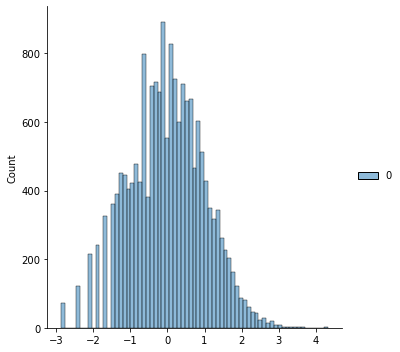

In [14]:
# Transformation log de n_modif
n_modif_tr = pt.fit_transform(
    np.array(X["n_modif"]).reshape(-1, 1))
#np.log(X["n_modif"])
data_tr["n_modif_tr"] = n_modif_tr

sns.displot(n_modif_tr)
plt.show()


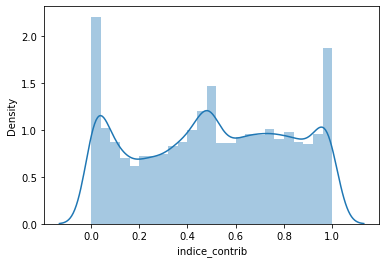

In [15]:
sns.distplot(X["indice_contrib"])
plt.show()


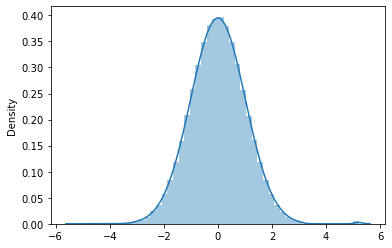

In [16]:
indice_contrib_tr = qt.fit_transform(
    np.array(X["indice_contrib"]).reshape(-1, 1))
data_tr["indice_contrib_tr"] = indice_contrib_tr

sns.distplot(indice_contrib_tr)
plt.show()


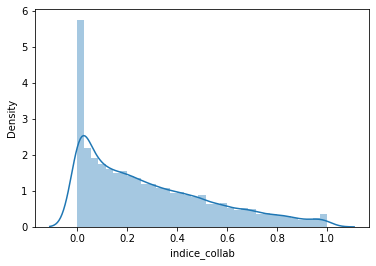

In [17]:
sns.distplot(X["indice_collab"])
plt.show()


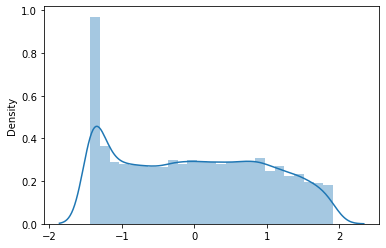

In [18]:
pt = PowerTransformer()
indice_collab_tr = pt.fit_transform(np.array(X["indice_collab"]).reshape(-1, 1))
data_tr["indice_collab_tr"] = indice_collab_tr

sns.distplot(indice_collab_tr)
plt.show()


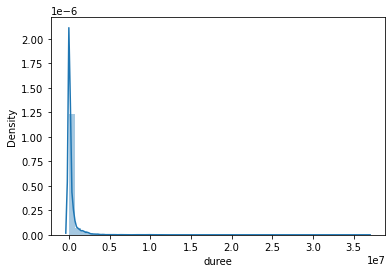

In [19]:
sns.distplot(X["duree"])
plt.show()


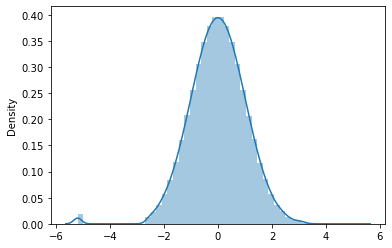

In [20]:
duree_tr = qt.fit_transform(
    np.array(X["duree"]).reshape(-1, 1))
data_tr["duree_tr"] = duree_tr

sns.distplot(duree_tr)
plt.show()


In [21]:
data_tr.describe()

,n_mots_tr,n_modif_tr,indice_contrib_tr,indice_collab_tr,duree_tr
count,1.770400e+04,1.770400e+04,17704.000000,1.770400e+04,17704.000000
mean,-6.325211e-16,-1.091661e-16,0.001724,4.173997e-17,-0.009274
std,1.000028e+00,1.000028e+00,1.008366,1.000028e+00,1.036310
min,-4.165811e+00,-2.872329e+00,-5.199338,-1.436316e+00,-5.199338
25%,-6.678123e-01,-6.710207e-01,-0.675032,-9.200377e-01,-0.674513
50%,2.421636e-03,2.408886e-02,0.000249,-1.992413e-02,0.000304
75%,6.529556e-01,6.978555e-01,0.673991,8.357524e-01,0.674936
max,4.354625e+00,4.329570e+00,5.199338,1.913342e+00,5.199338


In [22]:
# Normaliser les données 
scaler = StandardScaler()
scaler.fit(data_tr)
data_tr_scaled = pd.DataFrame(scaler.transform(data_tr),columns=data_tr.columns)
data_tr_scaled.describe()

,n_mots_tr,n_modif_tr,indice_contrib_tr,indice_collab_tr,duree_tr
count,1.770400e+04,1.770400e+04,1.770400e+04,1.770400e+04,1.770400e+04
mean,1.284307e-17,-3.852920e-17,-2.889690e-17,1.284307e-17,-2.568614e-17
std,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00
min,-4.165811e+00,-2.872329e+00,-5.158058e+00,-1.436316e+00,-5.008356e+00
25%,-6.678123e-01,-6.710207e-01,-6.711610e-01,-9.200377e-01,-6.419484e-01
50%,2.421636e-03,2.408886e-02,-1.462925e-03,-1.992413e-02,9.242873e-03
75%,6.529556e-01,6.978555e-01,6.667076e-01,8.357524e-01,6.602558e-01
max,4.354625e+00,4.329570e+00,5.154638e+00,1.913342e+00,5.026256e+00


<AxesSubplot:>

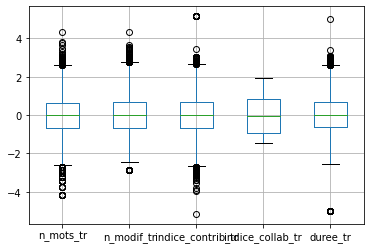

In [23]:
data_tr_scaled.boxplot()

## K-means

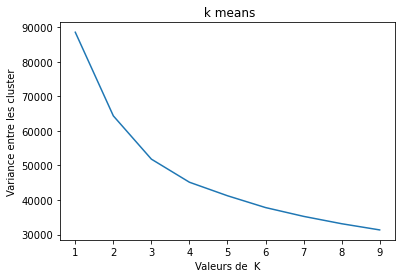

In [24]:
# Trouver le meilleur K
Sum_of_squared_distances = []
K = range(1, 10)
for num_clusters in K:
    model = KMeans(n_clusters=num_clusters)
    model.fit(data_tr_scaled)
    Sum_of_squared_distances.append(model.inertia_)
plt.plot(K, Sum_of_squared_distances)
plt.xlabel('Valeurs de  K')
plt.ylabel('Variance entre les cluster')
plt.title(' k means')
plt.show()

In [25]:
n_clusters = 4
model = KMeans(n_clusters=n_clusters)
model.fit(data_tr_scaled)
kmeans_labels = model.labels_


In [26]:
embedding = umap.UMAP(n_components=2, random_state=0, n_jobs=-1)
X_umap = embedding.fit_transform(data_tr_scaled)


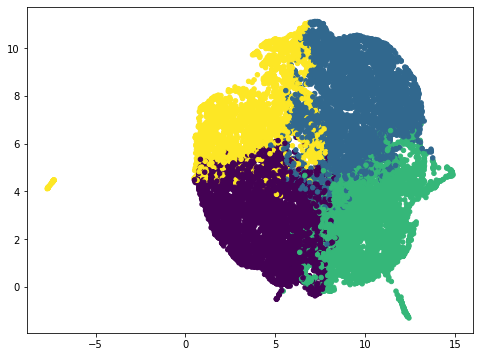

In [27]:
plt.figure(figsize=(8, 6))
columns = ['DIM' + str(c) for c in range(1, X_umap.shape[1]+1, 1)]
X_umap = pd.DataFrame(X_umap, index=X.index, columns=columns)
plt.scatter(X_umap.DIM1, X_umap.DIM2, c=kmeans_labels, s=20)
plt.show()

In [28]:
X["labels"] = kmeans_labels
gb = X.groupby(kmeans_labels)
result = pd.DataFrame(gb.mean()).sort_values("n_mots")
result["freq %"] =gb.size() / np.shape(X)[0] * 100 
result


,n_mots,indice_collab,indice_contrib,n_modif,duree,labels,freq %
3,52.448146,0.264506,0.418260,9.770270,13936.102137,3.0,17.973339
0,80.739676,0.563293,0.745320,24.354251,251762.708300,0.0,27.903299
1,167.943542,0.075893,0.220460,32.913380,264567.170340,1.0,29.213737
2,413.163265,0.249554,0.636361,85.150567,600691.163719,2.0,24.909625


In [43]:
# import datetime
# print(str(datetime.timedelta(seconds=13936.102137)),
#       str(datetime.timedelta(seconds=264567.170340)), str(datetime.timedelta(seconds=600691.163719), str(datetime.timedelta(seconds=590844.716306)))

str(datetime.timedelta(seconds=13936.102137))
### A faire :
# Changer le nom de l'indice de contribution en équilibre de contribution
# Regarder au niveau des missions
# Rajouter la position du labdoc : voir les tables report_part et report
# Enlever la variable nombre de modif
# voir test de student pour l'influence d'une variable dans un cluster
# Rajouter l'indicateur de coécriture
# UMAP explication des axes


'3:52:16.102137'

Les profiles des labdocs de chaque classe sont les suivants:
* Classe 3: labdoc trés petit avec une faible collaboration et faible contribution. C'est des labdocs  où  un seul étudiant contribue le plus et donc forcement il n y a pas de collaboration
* Classe 0: labdocs petit ou on collabore le plus et donc forcement c'est la ou il y a le plus de contribution
* Classe 1 : labdoc moyen avec une faible contribution et une trés faible collaboration 
* Classe 2: labdoc grand avec une forte contribution mais avec une collaboration moyenne. C'est des labdocs ou les étudiants travaillent peu sur la partie de leurs camarades

On remaque aussi:
* La collaboration est forte sur les petits labdocs 



In [64]:
gb.size() 


0    8204
1    3610
2    2867
3    3023
dtype: int64

In [68]:
print("cluster", 0, (data_full[data_full["labels"] == 0].groupby("n_users").size()) / 8204 * 100) 

print("cluster", 1, data_full[data_full["labels"]
      == 1].groupby("n_users").size() / 3610 * 100)
print("cluster", 2, data_full[data_full["labels"]
      == 2].groupby("n_users").size() / 2867 * 100)
print("cluster", 3, data_full[data_full["labels"]
      == 3].groupby("n_users").size() / 3023 * 100)


cluster 0 n_users
2    44.624573
3    13.639688
4     1.206728
5     0.292540
6     0.268162
7     0.134081
8     0.048757
dtype: float64
cluster 1 n_users
2    121.080332
3     20.415512
4      1.495845
5      0.249307
7      0.027701
dtype: float64
cluster 2 n_users
2    103.418207
3     37.739798
4      8.615277
5      2.999651
6      0.732473
7      0.279037
8      0.034880
dtype: float64
cluster 3 n_users
2    93.119418
3    12.007939
4     0.099239
5     0.033080
dtype: float64


In [ ]:
On remarque aussi : 
* Dans le Cluster 3

# Agglomerative clustering 

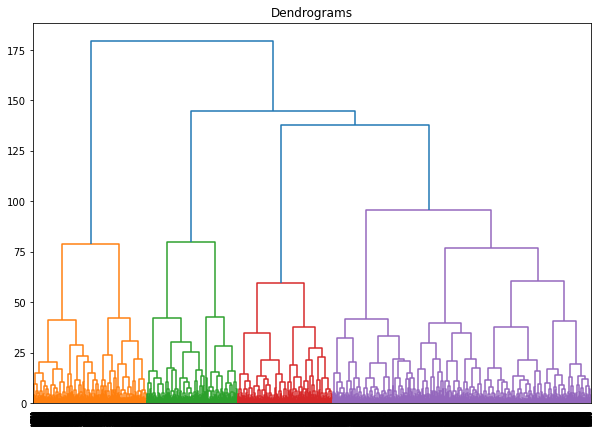

In [30]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_tr_scaled, method='ward'))


In [31]:
n_clusters = 4
model = AgglomerativeClustering(
    n_clusters=n_clusters, affinity='euclidean', linkage='ward')
agg_labels = model.fit_predict(data_tr_scaled)
#data_tr_scaled["labels"] = labels


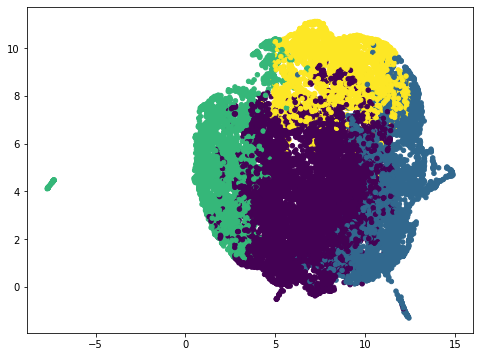

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(X_umap.DIM1, X_umap.DIM2, c=agg_labels, s=20)
plt.show()


In [33]:
X["labels"] = agg_labels
gb = X.groupby(agg_labels)
result = pd.DataFrame(gb.mean()).sort_values("n_mots")
result["freq %"] = gb.size() / np.shape(X)[0] * 100
result


,n_mots,indice_collab,indice_contrib,n_modif,duree,labels,freq %
2,35.808511,0.533077,0.577778,9.566446,131164.506104,2.0,16.194080
3,112.472048,0.063672,0.121366,22.671188,178527.606021,3.0,17.075237
0,128.105071,0.329295,0.637794,31.881399,297577.057655,0.0,46.339810
1,488.298615,0.192526,0.471886,94.078670,539718.038781,1.0,20.390872


In [34]:
X.columns

Index(['n_mots', 'indice_collab', 'indice_contrib', 'n_modif', 'duree', 'labels'], dtype='object')